# 2 Star Puzzle

**2 Star Puzzle** is a type of puzzle game where the goal is to place stars in a grid such that:
1. Each group in the grid has exactly 2 stars.
2. No two stars touch each other horizontally, vertically, or diagonally.

This game can also be played with fewer stars and sometimes more than 2 stars.

In [2]:
from ortools.sat.python import cp_model

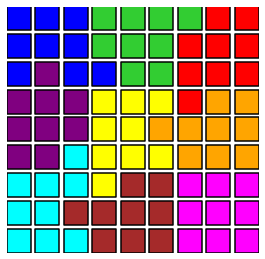

In [47]:
import matplotlib.pyplot as plt
import numpy as np

rows = cols = 9

stars = 2

groups = {0: [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,2), (2,3)],
          1: [(0,3),(0,4),(0,5),(0,6),(1,3),(1,4),(1,5),(2,4),(2,5)],
          2: [(0,7),(0,8),(1,6),(1,7),(1,8),(2,6),(2,7),(2,8),(3,6)],
          3: [(2,1),(3,0),(3,1),(3,2),(4,0),(4,1),(4,2),(5,0),(5,1)],
          4: [(3,3),(3,4),(3,5),(4,3),(4,4),(5,3),(5,4),(5,5),(6,3)],
          5: [(3,7),(3,8),(4,5),(4,6),(4,7),(4,8),(5,6),(5,7),(5,8)],
          6: [(5,2),(6,0),(6,1),(6,2),(7,0),(7,1),(8,0),(8,1),(8,2)],
          7: [(6,4),(6,5),(7,2),(7,3),(7,4),(7,5),(8,3),(8,4),(8,5)],
          8: [(6,6),(6,7),(6,8),(7,6),(7,7),(7,8),(8,6),(8,7),(8,8)]
          }

colors = {
0: 'blue',
1: 'limegreen',
2: 'red',
3: 'purple',
4: 'yellow',
5: 'orange', 
6: 'cyan', 
7: 'brown', 
8: 'magenta'
}

plt.figure(figsize=(4.5,4.5))

# Plotting grid
for i in range(rows):
    for j in range(cols):
        for k in groups:
            if (i,j) in groups[k]:
                plt.scatter(j,cols-i-1, marker = 's', color = colors[k], s = 600, edgecolors='k',  linewidth = 1.5)

plt.axis('off');

In [10]:
# Creates the model and set solver
model = cp_model.CpModel()
solver = cp_model.CpSolver()

x = {(i,j): model.NewBoolVar(f"x_{i}_{j}") for i in range(rows) for j in range(cols)}

# Each group is assinged 2 stars
for i in groups:
    model.Add(sum(x[a,b] for (a,b) in groups[i]) == stars)

# Each star cannot be next to a star horizontally, vertically, or diagonally
perimeter = [(0,1),(0,-1),(-1,0),(-1,1),(-1,-1),(1,0),(1,-1),(1,1)]
for i,j in x.keys():
    model.Add(sum(x[i+a,j+b] for (a,b) in perimeter if (i+a,j+b) in x.keys()) == 0).OnlyEnforceIf(x[i,j])

status = solver.Solve(model)

print(f"Status = {solver.StatusName(status)}")

Status = OPTIMAL


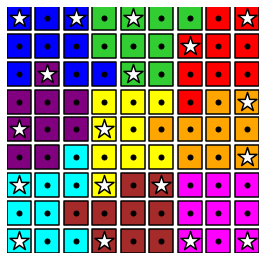

In [48]:
sol = [solver.value(x[i,j]) for i,j in x.keys()]
sol = np.reshape(sol,(rows,cols))

plt.figure(figsize=(4.5,4.5))

# Plotting solution
for i in range(rows):
    for j in range(cols):
        for k in groups:
            if (i,j) in groups[k]:
                plt.scatter(j,cols-i-1, marker = 's', color = colors[k], s = 600, edgecolors='k',  linewidth = 1.5)
                if sol[i,j] == 1:
                    plt.scatter(j,cols-i-1, marker = '*', color = 'w', s = 400, edgecolors='k', linewidth = 1.5)
                else:
                    plt.scatter(j,cols-i-1, marker = '.', color = 'k', s = 100, edgecolors='k')

plt.axis('off');